In [1]:
import optuna
from optuna.visualization.matplotlib import plot_parallel_coordinate
from optuna.visualization.matplotlib import plot_param_importances
from optuna.visualization.matplotlib import plot_contour

import matplotlib.pyplot as plt
import numpy as np

/home/user/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
db_endopoint = 'astromer.c1hqeh36ya5n.us-east-1.rds.amazonaws.com'
db = 'hp'
connection = 'mysql://root:abcdabcd@{}:3306/{}'.format(db_endopoint, 
                                                       db)
loaded_study = optuna.load_study(study_name="astromer_hp", 
                                 storage=connection)

In [4]:
rmse_list, r2_list = [], []
for trial in loaded_study.trials:
    try:
        rmse = trial.values[0]
        r2 = trial.values[1]
        rmse_list.append(rmse) 
        r2_list.append(r2)
    except:
        continue

In [9]:
loaded_study.trials[np.argmin(rmse_list)].params

{'num_layers': 1,
 'head_dim': 4,
 'num_heads': 32,
 'dff': 209,
 'dropout': 0.254988}

/tmp/ipykernel_18/3608767579.py:1: ExperimentalWarning: plot_parallel_coordinate is experimental (supported from v2.2.0). The interface can change in the future.
  ax = plot_parallel_coordinate(loaded_study,


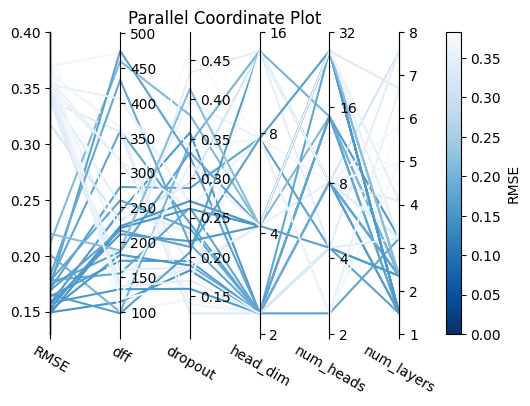

In [10]:
ax = plot_parallel_coordinate(loaded_study, 
                              target=lambda t: t.values[0], 
                              target_name='RMSE',
                        )
ax.set_ylim(0.13, 0.4)
ax.figure.set_dpi(100)

/tmp/ipykernel_18/2255744383.py:1: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  ax = plot_param_importances(loaded_study, target=lambda t: t.values[0], target_name='RMSE')


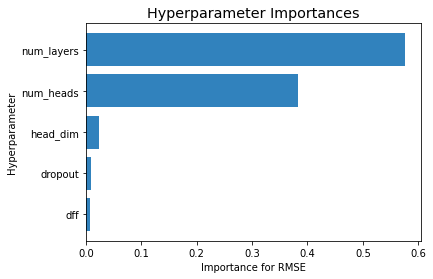

In [11]:
ax = plot_param_importances(loaded_study, target=lambda t: t.values[0], target_name='RMSE')

/tmp/ipykernel_18/3580800276.py:1: ExperimentalWarning: plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  axes = plot_contour(loaded_study,
[W 2022-08-16 15:00:35,096] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.


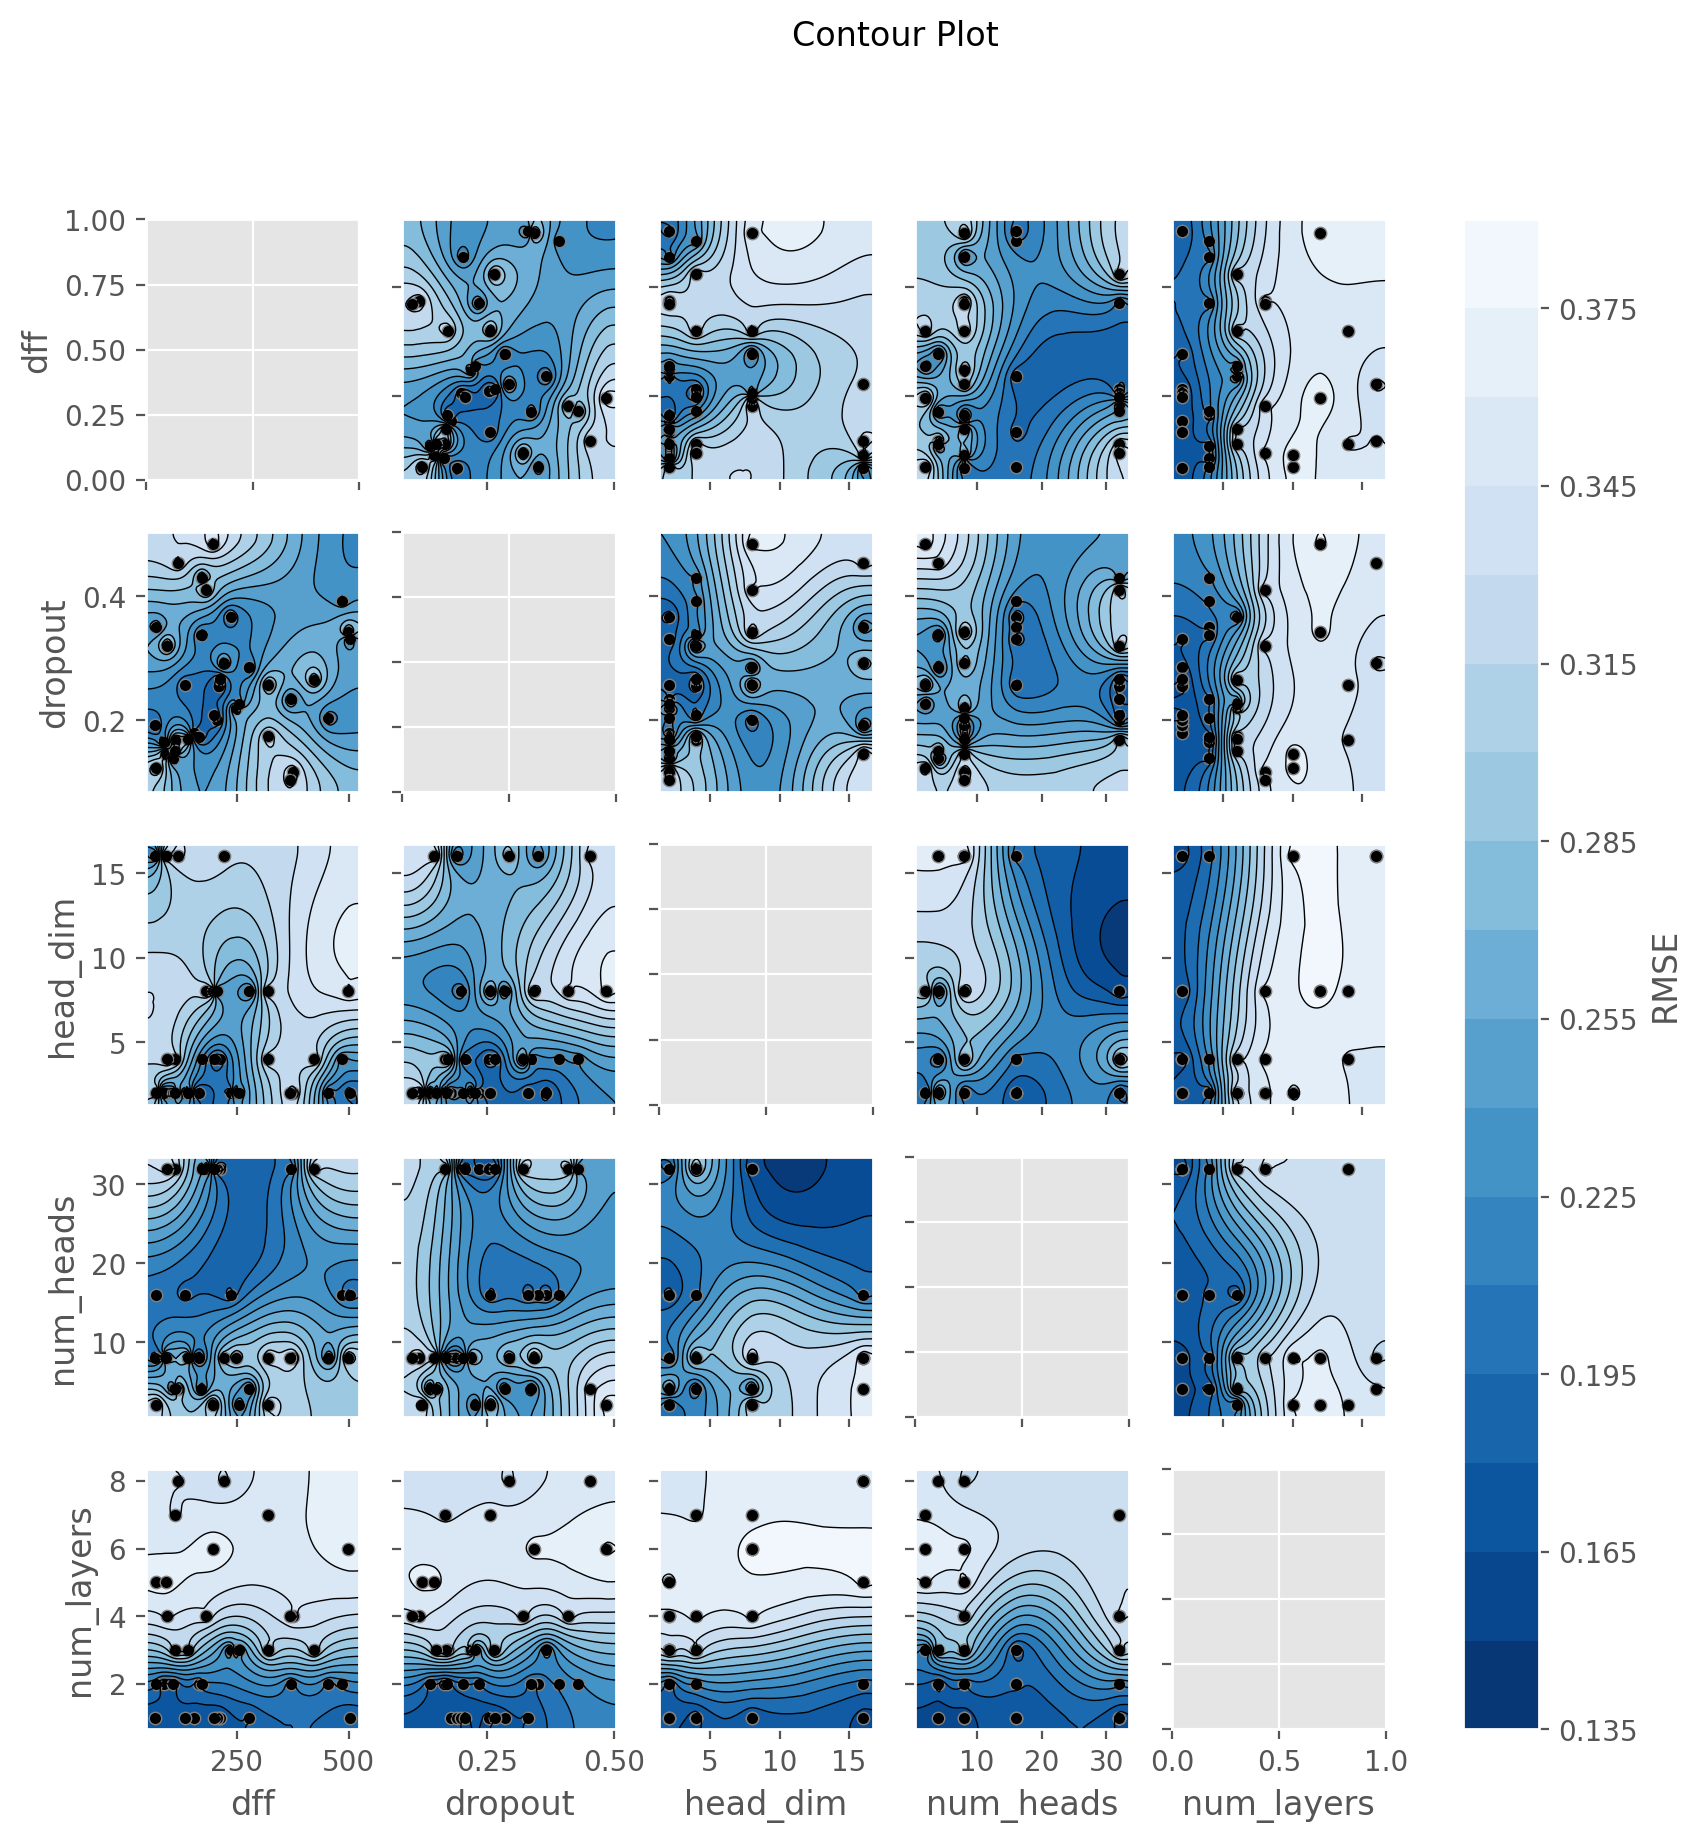

In [12]:
axes = plot_contour(loaded_study, 
                    target=lambda t: t.values[0], target_name='RMSE',
                    )
axes[0][0].figure.set_size_inches(10,10)
axes[0][0].figure.set_dpi(200)